# Absenteeism at Work

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp

from docx import Document
from scipy.stats import stats
from scipy.stats import poisson
from scipy.stats import shapiro 
from scipy.stats import pearsonr

from matplotlib_venn import venn2

from warnings import filterwarnings
filterwarnings("ignore")

ModuleNotFoundError: No module named 'docx'

In [ ]:
# pip install seaborn

In [ ]:
# pip install python-docx

In [ ]:
# pip install researchpy

In [ ]:
# pip install --upgrade pip

In [ ]:
# ?pd.get_option

In [ ]:
# ?pd.set_option

In [ ]:
# pd.describe_option('display')

In [ ]:
# pip install jupyter_contrib_nbextensions

In [ ]:
# pip install matplotlib-venn

## To set some defaults
## いくつかのデフォルトを設定する

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x:'%.2f' % x)
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_seq_items', None)
pd.set_option('max_colwidth', -1)
pd.set_option('display.colheader_justify', 'right')

C:\Users\bunya\AppData\Local\Temp\ipykernel_13624\4164126086.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [ ]:
plt.rcParams["figure.figsize"] = (13, 7)
plt.rcParams['figure.dpi'] = 72
plt.rcParams["hist.bins"] = (13,2)

In [5]:
sns.set_palette("Paired")
sns.set_theme(style="whitegrid")

In [ ]:
# sns.color_palette("tab10")

In [ ]:
# %matplotlib notebook
# %matplotlib inline
# %matplotlib widget

## Loading data and overview
## データ読み込みと概要

In [ ]:
df = pd.read_csv("Absenteeism_at_work.csv", sep=";")

In [ ]:
info = Document("UCI_ABS_TEXT.docx")
for i in info.paragraphs:
    print(i.text)

# sadece text değil bütün belgeyi göstermek nasıl yapılır ?

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.rename(columns={'Work_load_Average/day_': 'Work_load_Average_day'}, inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.describe().T

## Descriptive statistics of Data
## データの記述統計

In [ ]:
rp.summary_cont(df[['Transportation_expense', 
                    'Distance_from_Residence_to_Work', 
                    'Service_time', 
                    'Age', 
                    'Work_load_Average_day', 
                    'Hit_target', 
                    'Pet', 
                    'Weight', 
                    'Height', 
                    'Body_mass_index', 
                    'Absenteeism_time_in_hours']])

In [ ]:
rp.summary_cat(df[['Reason_for_absence', 
                   'Month_of_absence', 
                   'Day_of_the_week', 
                   'Seasons', 
                   'Disciplinary_failure', 
                   'Education', 
                   'Son', 
                   'Social_drinker', 
                   'Social_smoker', 
                   'Pet']])

## Covariance of variables
## 変数の共分散

In [ ]:
df.loc[:, df.columns != "ID"].cov()

### Dividing the covariance table into negative and positive
### 分散行列を負と正に分割する

In [ ]:
rows, cols = df.shape

corr_neg = []
corr_pos = []

for i in range(cols):
    for j in range(i+1, cols):
        if df.cov().values[i,j] > 0:
            corr_pos.append(list(df.columns)[i])
            corr_pos.append(list(df.columns)[j])
            corr_pos.append(df.cov().values[i,j])
        elif df.cov().values[i,j] < 0:
            corr_neg.append(list(df.columns)[i])
            corr_neg.append(list(df.columns)[j])
            corr_neg.append(df.cov().values[i,j])
        else:
            print("Warning!")

In [ ]:
pd.DataFrame(corr_pos)

In [ ]:
pd.DataFrame(corr_neg)

## Correlations of variables
## 変数の相関

In [ ]:
df.loc[:, df.columns != "ID"].corr()

### Finding correlations over 0.5 and under -0.5
### 0.5を超えと-0.5未満の相関関係を見つける

In [ ]:
df.shape

In [ ]:
rows, cols = df.shape

corr = []

for i in range(cols):
    for j in range(i+1, cols):
        if df.corr().values[i,j] >= 0.5 or df.corr().values[i,j] <= -0.5:
            corr.append(list(df.columns)[i])
            corr.append(list(df.columns)[j])
            corr.append(df.corr().values[i,j])
            
pd.DataFrame(corr)

# sütun ve pivot table'a çevrilecek ya da gruplamak?

### Examine variables that are moderately and highly correlated with each other
### 相互に中程度および高い相関関係がある変数の調べる
<br>

#### "Reason for Absence" and "Disciplinary Failure"

In [ ]:
df[["Reason_for_absence", "Disciplinary_failure"]].corr()

# İki kategorik değişken arasındaki kolerasyon ? 
# Her ne kadar bu değişkenler sayısal görünse ve negatif yönlü orta bir kolerasyon çıksa da, biz bu değişkenlerin 
# kategorik olduğunu biliyoruz. Bu yüzden kategorik değişkenler arasındaki ilişki olarak ele alacağız. 

In [ ]:
test, p = shapiro(df["Reason_for_absence"])
print("  Reason for absence = correlation: %.2f, p-value: %.2f" %(test,p))
test, p = shapiro(df["Disciplinary_failure"])
print("Disciplinary failure = correlation: %.2f, p-value: %.2f" %(test,p))

In [ ]:
df[["Reason_for_absence", "Disciplinary_failure"]].corr(method='spearman')

In [ ]:
df.plot.scatter("Reason_for_absence", "Disciplinary_failure");

#### "Service Time" and "Age"

In [ ]:
df[["Service_time", "Age"]].corr()

In [ ]:
test, p = shapiro(df["Service_time"])
print("Service Time = correlation: %.2f, p-value: %.2f" %(test,p))
test, p = shapiro(df["Age"])
print("         Age = correlation: %.2f, p-value: %.2f" %(test,p))

In [ ]:
df[["Service_time", "Age"]].corr(method='spearman')

In [ ]:
stats.spearmanr(df[["Service_time", "Age"]])

In [ ]:
df.plot.scatter("Service_time", "Age");

NameError: name 'df' is not defined

In [ ]:
# stats.spearmanr(df[["Reason_for_absence", "Disciplinary_failure"]])

#### "Service Time" and "Body mass index"

In [ ]:
df[["Service_time", "Body_mass_index"]].corr()

In [ ]:
test, p = shapiro(df["Service_time"])
print("   Service Time = correlation: %.2f, p-value: %.2f" %(test,p))
test, p = shapiro(df["Body_mass_index"])
print("Body mass index = correlation: %.2f, p-value: %.2f" %(test,p))

In [ ]:
df[["Service_time", "Body_mass_index"]].corr(method='spearman')

In [ ]:
stats.spearmanr(df[["Service_time", "Body_mass_index"]])

In [ ]:
df.plot.scatter("Service_time", "Body_mass_index");

#### "Body mass index" and "Weight"

In [ ]:
df[["Body_mass_index", "Weight"]].corr()

In [ ]:
test, p = shapiro(df["Body_mass_index"])
print("Body mass index = correlation: %.2f, p-value: %.2f" %(test,p))
test, p = shapiro(df["Weight"])
print("         Weight = correlation: %.2f, p-value: %.2f" %(test,p))

In [ ]:
df[["Body_mass_index","Weight"]].corr(method='spearman')

In [ ]:
stats.spearmanr(df[["Body_mass_index", "Weight"]])

In [ ]:
df.plot.scatter("Body_mass_index", "Weight");

### Visualizing it all together
### それをすべて一緒に視覚する

_Note: Aspect (hue) is Disciplinary Failure_
<br>
_注：Aspect(hue)はDisciplinary Failure_

In [ ]:
sns.pairplot(df,
             hue="Disciplinary_failure",
             palette= ("tab10"),             
             kind="reg",
             x_vars=['Age', 'Service_time', 'Weight', 'Body_mass_index'], 
             y_vars =['Age','Service_time', 'Weight', 'Body_mass_index']);

#### <a id='corr_target'>In addition, Correlations between target variable and other variables<br><br>さらに、ターゲット変数と他の変数間の相関</a>


In [719]:
corr_t = []

for i in df.loc[:, df.columns != "ID"]:
    corr =  df[i].corr(df["Absenteeism_time_in_hours"])
    corr_t.append(df[i].name)
    corr_t.append(corr)
pd.DataFrame(corr_t)

,0
0,Reason_for_absence
1,-0.18
2,Month_of_absence
3,0.02
4,Day_of_the_week
5,-0.12
6,Seasons
7,-0.01
8,Transportation_expense
9,0.03


## Examining the ID variable  
## ID変数を調べる
<br>
According to the below examine, there are 740 records, but there is more than one record of each person in these records.<br>
以下の数表によると、740の記録がありますが、これらの記録には各人の記録が複数あります。

In [ ]:
df[['ID']]

In [ ]:
df[['ID']].shape

In [ ]:
df.sort_values("ID")

### Calculating the probability of error during to enter IDs with the Poisson distribution
### ポアソン分布でIDを入力する際のエラーの確率を計算する

Since there are so many records, we will observe if there is a mistake in the records. For example, the same ID may be given to two different persons.<br>
記録が多いので、記録に間違いが可能性があります。 たとえば、同じIDが2人の異なる人に与えられる場合があります。

_Poisson distribution_
#### _${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n_

__Note:__ _We don't know the lambda (λ), but if we think there is at least one error during the record keeping period (July 2007 to July 2010), I get the lambda as 1._ <br>
__注：__ ラムダ (λ) はわかりませんが、記録保持期間（2007年7月から2010年7月）に少なくとも1つのエラーがあると思われる場合、ラムダは1になります。

In [ ]:
poisson(mu=1).pmf(k=1)

### Variables that identify the ID
### ID を特定する変数

I identified variables that would describe a person's characteristics. I will create a new Data Frame from these columns.
So that I can examine each person [ID] more closely.<br>
人の特徴を表す変数を特定しました。 それから一人[ID]をもっと詳しく調べられるように列から新しいデータフレームを作成します。

In [ ]:
df.columns

In [ ]:
['ID','Age', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index']

In [ ]:
df_ID = df[['ID',
            'Age', 
            'Weight', 
            'Height',
            'Body_mass_index',
            'Education', 
            'Son', 
            'Social_drinker', 
            'Social_smoker', 
            'Pet']]

In [ ]:
df_ID

In [ ]:
df_ID.sort_values('ID', inplace=True)

In [ ]:
df_ID

In [ ]:
df_ID.drop_duplicates(inplace=True)

In [ ]:
df_ID

In [ ]:
df_ID["ID"].to_list()

In [ ]:
df_ID_list = df_ID["ID"].to_list()

In [ ]:
ID = []
for i in df_ID_list:
    if i in ID:
        print (i)
    else:
        ID.append(i)

According to the result of the above for loop, there are two people who has the ID of 29th. Let's check the ID of 29th person.<br>
上記のforループの結果によると、IDが29番目の人が2人います。 29人目のIDを確認しましょう。

In [ ]:
df_ID[df_ID.ID == 29]

As seen above, there are two people with ID 29. Let's take a closer look at these people and consider how to fix this mistake. <br>
上記のように、ID 29の人が2人います。これらの人を詳しく見て、この間違いを修正する方法を考えてみましょう。

In [ ]:
df[df.ID == 29]

Looking at ID29 above, there are two people, 41 and 28 years old. There is only one record for 28 years old. This record represents little information about the data, but I'm still thinking of assigning it to a different ID rather than deleting it. <br>
上記のID29を見ると、41歳と28歳の2人がいます。28歳の記録は1つだけです。 この記録はデータに関する情報をほとんど表していないが、それでも削除するのではなく、別のIDに割り当てることを考えています。

In [ ]:
df.loc[[51]] = df.loc[[51]].replace(to_replace=29,value=37)

In [ ]:
df[df.ID == 37]

In [ ]:
df[df.ID == 29]

In [ ]:
#df.drop(axis=0, index=51, inplace=True)  
#for deleting

In [ ]:
plt_bar_ID = df["ID"].value_counts().plot(kind="bar",
                                          figsize=(11, 7), 
                                          color='#EC0301', 
                                          zorder=2,
                                          width=0.85,
                                          rot=0);

plt_bar_ID.set_xlabel("ID", labelpad=20, weight='bold', size=12)
plt_bar_ID.set_ylabel("Frequencies", labelpad=20, weight='bold', size=12);

In [ ]:
df[df.ID == 3].head(10)

## Examining Categorical Variables
## カテゴリ変数を調べろ

In [ ]:
df.head()

### Detecting categorical variables
### カテゴリ変数を見つける

#### <a id='Attribute_Information_File'>Attribute Information File</a> 

In [ ]:
A_I = Document("Attribute Information.docx")
for i in A_I.paragraphs:
    print(i.text)

In [ ]:
df.columns

In [ ]:
df_Cat = df[["Reason_for_absence", 
             "Month_of_absence", 
             "Day_of_the_week",
             "Seasons", 
             "Disciplinary_failure", 
             "Education", 
             "Son", 
             "Social_drinker", 
             "Social_smoker", 
             "Pet"]]

In [ ]:
df_Cat.head()

In [ ]:
df_Cat.columns

### Counting the values of all categorical columns at the same time
### すべてのカテゴリ列の値を同時にカウントする

In [ ]:
avc = []
for i in df_Cat.columns:
    vc = df_Cat[i].value_counts()
    avc.append(df_Cat[i].name)
    avc.append(vc)
avc

### Reason for absence
### 欠席の理由

In [ ]:
df[["Reason_for_absence"]]

In [ ]:
df["Reason_for_absence"].value_counts()

In [ ]:
rfa = df.Reason_for_absence.unique()

In [ ]:
rfa.sort()

In [ ]:
rfa.tolist()

In [ ]:
df["Reason_for_absence"].value_counts().count()

In [ ]:
for i in range(0,28):
    if i not in rfa.tolist():
        print(i)

In [ ]:
df[df.Reason_for_absence == 20]

According to the above analysis, There is no record of absence number 20. That's interesting.

And according to [Attribute Information](#Attribute_Information_File):

20 represent: _External causes of morbidity and mortality_

That's because represent external causes of death :)

上記の分析によると、欠席番号20の記録はありません。それは興味深いです。

そして[Attribute Information](#Attribute_Information_File)によると：

20の意味：罹患率と死亡率の外部原因

それは死因を表すからです。 :)

In [ ]:
plt_bar = df["Reason_for_absence"].value_counts().plot(kind="bar",
                                                       figsize=(11, 7), 
                                                       color='#EC0301', 
                                                       zorder=2,
                                                       width=0.85,
                                                       rot=0);

plt_bar.set_xlabel("Reason for Absence", labelpad=20, weight='bold', size=12)
plt_bar.set_ylabel("Frequencies", labelpad=20, weight='bold', size=12);

According to the above analysis, the two highest frequencies in the "Reason for Absence" categorical variable are 23 and 28.

And according to [Attribute Information](#Attribute_Information_File):

23 represent: _medical consultation_

28 represent: _dental consultation_

上記の分析によると、欠席の理由 [Reason for Absence] カテゴリ変数の2つの最も高い頻度は23と28です。

そして[Attribute Information](#Attribute_Information_File)によると：

23の意味：診察

28の意味： 歯科検診

In [ ]:
df.columns

In [ ]:
(sns.barplot(x="Reason_for_absence",y="Absenteeism_time_in_hours",data=df)
 .set(xlabel="Reason for absence", ylabel="Absenteeism time in hours"));

In [ ]:
df[df.Reason_for_absence == 0].sort_values("ID")

In [ ]:
df[df.Reason_for_absence == 0].sort_values("ID").drop_duplicates("ID")

In [ ]:
df[df.Reason_for_absence == 9].sort_values("ID")

### Days, Months, and Seasons
### 日、月、季節

#### Seasons
#### 季節

In [ ]:
df[["Seasons"]]

In [ ]:
df["Seasons"].value_counts()

In [ ]:
(df.groupby("Seasons")[["Absenteeism_time_in_hours"]].sum().sort_values("Absenteeism_time_in_hours"))

In [ ]:
(df[["Seasons","Month_of_absence"]]
 .sort_values("Seasons").drop_duplicates()
 .set_index("Seasons"))

In [ ]:
(df[["Seasons","Month_of_absence"]]
 .sort_values("Month_of_absence").drop_duplicates()
 .set_index("Seasons")).query("Seasons == 1")

In [ ]:
(df[["Seasons","Month_of_absence"]]
 .sort_values("Month_of_absence").drop_duplicates()
 .set_index("Seasons")).query("Seasons == 2")

In [ ]:
(df[["Seasons","Month_of_absence"]]
 .sort_values("Month_of_absence").drop_duplicates()
 .set_index("Seasons")).query("Seasons == 3")

In [ ]:
(df[["Seasons","Month_of_absence"]]
 .sort_values("Month_of_absence").drop_duplicates()
 .set_index("Seasons")).query("Seasons == 4")

The Seasons variable was analyzed in the tables above. It was found out which seasons the numbers in the variable Seasons represent over months. However, there is a small problem, like the months at the end of the season are written in twos. For example; December, the 12th month, is present in both seasons 4 and 2.
To solve this problem, it may be necessary to investigate the climate of Brazil, where the dataset was created, and make decisions accordingly.

季節変数(Seasons)は、上記の表で分析されました。 季節変数(Seasons)の数値が月を表すのはどの季節であるかがわかりました。 ただし、季節の終わりの月が2で書かれるなど、小さな問題があります。  例えば、12月は、季節4と2の両方に存在します。
この問題を解決するには、データセットが作成されたブラジルの気候を調査し、それに応じて決定を下す必要があるかもしれません。

1 = Winter  { Brazil in Winter: June(6), July(7), August(8) }

2 = Summer  { Brazil in Summer: December(12), January(1), February(2) }

3 = Autumn  { Brazil in Autumn: March(3), April(4), May(5) }

4 = Spring  { Brazil in Spring: September(9), October(10), November(11) }

https://seasonsyear.com/Brazil

https://en.wikipedia.org/wiki/Climate_of_Brazil

In [ ]:
(sns.barplot(x="Seasons",y="Absenteeism_time_in_hours",data=df)
 .set(xlabel="Season", ylabel="Absenteeism time in hours"));

In [ ]:
(sns.barplot(x="Seasons",
             y="Absenteeism_time_in_hours",
             hue="Day_of_the_week",
             data=df)
 .set(xlabel="Seasons", ylabel="Absenteeism time in hours"));

#### Months
#### 月

In [ ]:
df[["Month_of_absence"]]

In [ ]:
df["Month_of_absence"].value_counts()

In [ ]:
(df.groupby("Month_of_absence")[["Absenteeism_time_in_hours"]].sum().sort_values("Absenteeism_time_in_hours"))

There is a problem above, the variable "Month_of_absence" has a value of 0. Most likely this represents no absence. 
IDs with this value should be examined in more detail.<br>
上記の問題があります。変数「Month_of_absence」の中に0値があります。おそらく、これは欠席がないことを表します。
この値を持つIDは、より詳細に調べる必要があります。

In [ ]:
df[df.Month_of_absence == 0]

In [ ]:
df[df.ID == 4]

In [ ]:
df[df.ID == 8]

In [ ]:
df[df.ID == 35]

People with these IDs have no absences and also they have very few records. I'm thinking of treating these IDs as missing values and deleting them.<br>
これらのIDを持つ人々には欠席がなく、記録もほとんどありません。 これらのIDを欠測値として扱い、削除することを考えています。

In [ ]:
df.drop(axis=0, index=739, inplace=True)
df.drop(axis=0, index=738, inplace=True)
df.drop(axis=0, index=737, inplace=True)
df.drop(axis=0, index=276, inplace=True)

In [ ]:
df["Month_of_absence"].value_counts()

In [ ]:
(sns.barplot(x="Month_of_absence",
             y="Absenteeism_time_in_hours",
             data=df)
 .set(xlabel="Month of absence", ylabel="Absenteeism time in hours"));

In [ ]:
(sns.barplot(x="Month_of_absence",
             y="Absenteeism_time_in_hours",
             hue="Day_of_the_week",
             data=df)
 .set(xlabel="Month of absence", ylabel="Absenteeism time in hours"));

#### Days
#### 日

According to [Attribute Information](#Attribute_Information_File):<br>
[Attribute Information](#Attribute_Information_File)によると：

Day of the week = Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)
<br>
曜日 = 月（2）、火（3）、水（4）、木（5）、金（6）

In [ ]:
df[["Day_of_the_week"]]

In [ ]:
df["Day_of_the_week"].value_counts()

In [ ]:
(df.groupby("Day_of_the_week")[["Absenteeism_time_in_hours"]].sum().sort_values("Absenteeism_time_in_hours"))

In [ ]:
(sns.barplot(x="Day_of_the_week",
             y="Absenteeism_time_in_hours",
             data=df)
 .set(xlabel="Days of the week", 
      ylabel="Absenteeism time in hours"));

In [ ]:
(sns.barplot(x="Day_of_the_week",
             y="Absenteeism_time_in_hours",
             hue="Seasons",data=df)
 .set(xlabel="Days of the week", 
      ylabel="Absenteeism time in hours"));

### Smokers and Drinkers
### 喫煙者と飲酒者

In [ ]:
df["Social_smoker"].value_counts()

In [ ]:
df["Social_drinker"].value_counts()

In [ ]:
plt_bar = df["Social_smoker"].value_counts().plot(kind="bar",
                                                       figsize=(11, 7), 
                                                       color='#EC0301', 
                                                       zorder=2,
                                                       width=0.85,
                                                       rot=0);

plt_bar.set_xlabel("Social Smoker", labelpad=20, weight='bold', size=12)
plt_bar.set_ylabel("Frequencies", labelpad=20, weight='bold', size=12);

In [ ]:
plt_bar = df["Social_drinker"].value_counts().plot(kind="bar",
                                                       figsize=(11, 7), 
                                                       color='#EC0301', 
                                                       zorder=2,
                                                       width=0.85,
                                                       rot=0);

plt_bar.set_xlabel("Social Drinker", labelpad=20, weight='bold', size=12)
plt_bar.set_ylabel("Frequencies", labelpad=20, weight='bold', size=12);

In [ ]:
df.groupby(["Social_smoker","Social_drinker"])[["Absenteeism_time_in_hours"]].sum()

In [ ]:
df.groupby(["Social_smoker","Social_drinker"])[["Absenteeism_time_in_hours"]].aggregate("sum").unstack()

In [ ]:
(sns.barplot(x="Social_smoker",
             y="Absenteeism_time_in_hours",
             hue ="Social_drinker",
             data=df)
 .set(xlabel="Social Smoker", 
      ylabel="Absenteeism time in hours",
      ylim=(0,10)));

### Education & Disciplinary Failure
### 教育と懲戒事由

__[Attribute Information](#Attribute_Information_File):__

__Education:__ 

__1 :__ _high school_

 __2 :__ _graduate_

 __3 :__ _postgraduate_

 __4 :__ _master and doctor_

In [ ]:
df["Education"].value_counts()

In [ ]:
df["Disciplinary_failure"].value_counts()

In [ ]:
df.groupby("Education")[["Disciplinary_failure"]].sum()

In [ ]:
(df.query("Disciplinary_failure == 1")
 .sort_values("ID"))

In [ ]:
# (df.query("Disciplinary_failure == 1")[["ID","Education","Disciplinary_failure","Absenteeism_time_in_hours","Month_of_absence","Transportation_expense"]]
#  .drop_duplicates("ID")
#  .sort_values("ID"))

In [ ]:
df.groupby("Disciplinary_failure")[["Absenteeism_time_in_hours"]].sum()

In [ ]:
df[["Disciplinary_failure","Absenteeism_time_in_hours"]].query("Disciplinary_failure == 1")

In [ ]:
df.groupby("Education")[["Absenteeism_time_in_hours"]].sum()

In [ ]:
df.groupby(["Disciplinary_failure","Education"])[["Absenteeism_time_in_hours"]].sum()

In [ ]:
# df[df.Education == 4]

In [ ]:
# df.query("Education == 3 & Disciplinary_failure == 1")

In [ ]:
# df.query("Education == 3 & Disciplinary_failure == 1")[["ID","Education","Disciplinary_failure","Absenteeism_time_in_hours"]]

In [ ]:
# df.query("Education == 2 & Disciplinary_failure == 1")

In [ ]:
# df.query("Education == 2 & Disciplinary_failure == 1")[["ID","Education","Disciplinary_failure","Absenteeism_time_in_hours"]]

In [ ]:
# df.query("Education == 1 & Disciplinary_failure == 1")

In [ ]:
# (df.query("Education == 1 & Disciplinary_failure == 1")[["ID","Education","Disciplinary_failure","Absenteeism_time_in_hours"]]
#  .drop_duplicates("ID")
#  .sort_values("ID"))

In [ ]:
(sns.barplot(x="Disciplinary_failure",
             y="Absenteeism_time_in_hours",
             hue="Education",
             data=df)
 .set(xlabel="Disciplinary Failure", 
      ylabel="Absenteeism time in hours"));

In [ ]:
#df[df.ID == 1].sum()

In [ ]:
(sns.barplot(x="Disciplinary_failure",
             y="Absenteeism_time_in_hours",
             data=df)
 .set(xlabel="Disciplinary Failure", 
      ylabel="Absenteeism time in hours"));

The tables and analyses above shows the relationship between education level, disciplinary failure and absenteeism. There is an inverse proportion between education and discipline failure.
Also during to examining the relationship between education level and disciplinary failure, it is explored that a person may have more than one disciplinary failure.
So I may need to change the disciplinary failure variable and add a few more categories. 
Because, in its current form, it is categorized as only failured or not, whereas there are people who have failured more than once.
In addition, as an interesting information, it is observed that no one who has disciplinary failure is absent.
<br>
上記の表と分析は、教育レベル、懲戒処分の失敗、欠席主義の関係を示しています。 教育と規律の失敗の間には反比例があります。
また、教育レベルと懲戒の失敗との関係を調べる際に、人が複数の懲戒の失敗を持っている可能性があることが調査されます。
したがって、懲戒失敗変数を変更し、さらにいくつかのカテゴリを追加する必要があるかもしれません。
なぜなら、現在の形では、失敗したかどうかに分類されているのに対し、何度も失敗した人がいるからです。
また、興味深い情報として、懲戒処分に失敗した人がいないことはありません。

### Son & Pet
### 子とペット

In [ ]:
df.columns

In [ ]:
df["Son"].value_counts()

In [ ]:
df["Pet"].value_counts()

In [ ]:
df.groupby(["Son"])[["Absenteeism_time_in_hours"]].sum()

In [ ]:
df.sort_values()

In [ ]:
(df.groupby(["Pet"])[["Absenteeism_time_in_hours"]].sum().sort_values("Absenteeism_time_in_hours",ascending=False))

In [ ]:
df.groupby(["Son","Pet"])[["Absenteeism_time_in_hours"]].sum()

In [ ]:
(df.groupby(["Son","Pet"])[["Absenteeism_time_in_hours"]].sum().sort_values("Absenteeism_time_in_hours",ascending=False))

In [ ]:
plt_bar_ID = df["Son"].value_counts().plot(kind="bar",
                                          figsize=(11, 7), 
                                          color='#EC0301', 
                                          zorder=2,
                                          width=0.85,
                                          rot=0);

plt_bar_ID.set_xlabel("Son", labelpad=20, weight='bold', size=12)
plt_bar_ID.set_ylabel("Frequencies", labelpad=20, weight='bold', size=12);

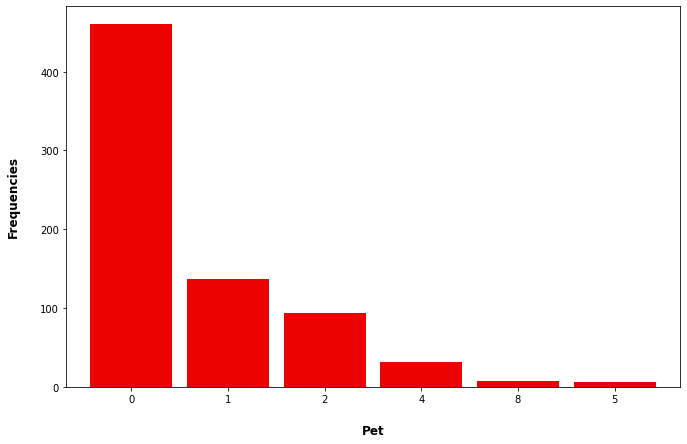

In [658]:
plt_bar_ID = df["Pet"].value_counts().plot(kind="bar",
                                          figsize=(11, 7), 
                                          color='#EC0301', 
                                          zorder=2,
                                          width=0.85,
                                          rot=0);

plt_bar_ID.set_xlabel("Pet", labelpad=20, weight='bold', size=12)
plt_bar_ID.set_ylabel("Frequencies", labelpad=20, weight='bold', size=12);

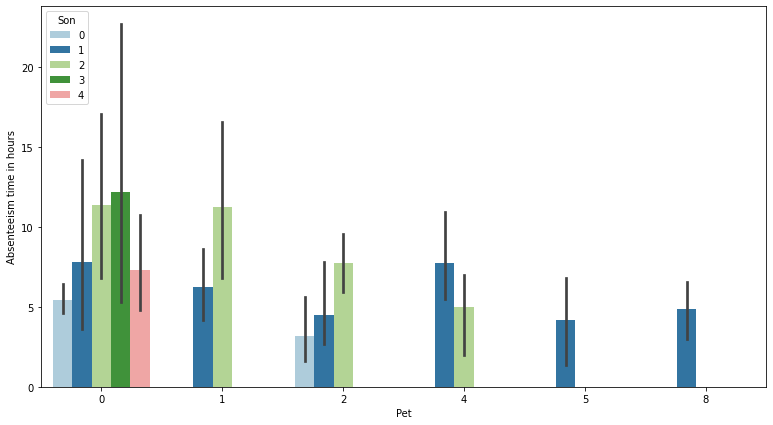

In [656]:
(sns.barplot(x="Pet",
             y="Absenteeism_time_in_hours",
             hue="Son",
             data=df)
 .set(xlabel="Pet", 
      ylabel="Absenteeism time in hours"));

In [ ]:
df_Cat.columns

## Continuous and discrete variables
## 連続と離散変数

In [619]:
df.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours'], dtype='object')

In [630]:
df_cd = df[['ID',
            'Transportation_expense', 
            'Distance_from_Residence_to_Work', 
            'Service_time', 
            'Age', 
            'Work_load_Average_day', 
            'Hit_target', 
            'Weight', 
            'Height', 
            'Body_mass_index', 
            'Absenteeism_time_in_hours']]

In [631]:
df_cd

,ID,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,289,36,13,33,239.55,97,90,172,30,4
1,36,118,13,18,50,239.55,97,98,178,31,0
2,3,179,51,18,38,239.55,97,89,170,31,2
3,7,279,5,14,39,239.55,97,68,168,24,4
4,11,289,36,13,33,239.55,97,90,172,30,2
5,3,179,51,18,38,239.55,97,89,170,31,2
6,10,361,52,3,28,239.55,97,80,172,27,8
7,20,260,50,11,36,239.55,97,65,168,23,4
8,14,155,12,14,34,239.55,97,95,196,25,40
9,1,235,11,14,37,239.55,97,88,172,29,8


In [640]:
df_cd.loc[:, df_cd.columns != "ID"].describe().T

,count,mean,std,min,25%,50%,75%,max
Transportation_expense,736.00,221.50,67.01,118.00,179.00,225.00,260.00,388.00
Distance_from_Residence_to_Work,736.00,29.62,14.85,5.00,16.00,26.00,50.00,52.00
Service_time,736.00,12.55,4.40,1.00,9.00,13.00,16.00,29.00
Age,736.00,36.42,6.46,27.00,31.00,37.00,40.00,58.00
Work_load_Average_day,736.00,271.46,39.16,205.92,244.39,264.25,294.22,378.88
Hit_target,736.00,94.60,3.76,81.00,93.00,95.00,97.00,100.00
Weight,736.00,78.96,12.85,56.00,69.00,81.50,89.00,108.00
Height,736.00,172.12,6.05,163.00,169.00,170.00,172.00,196.00
Body_mass_index,736.00,26.65,4.27,19.00,24.00,25.00,31.00,38.00
Absenteeism_time_in_hours,736.00,6.96,13.36,0.00,2.00,3.00,8.00,120.00


In [662]:
# sns.displot(df.Transportation_expense,kde=True);

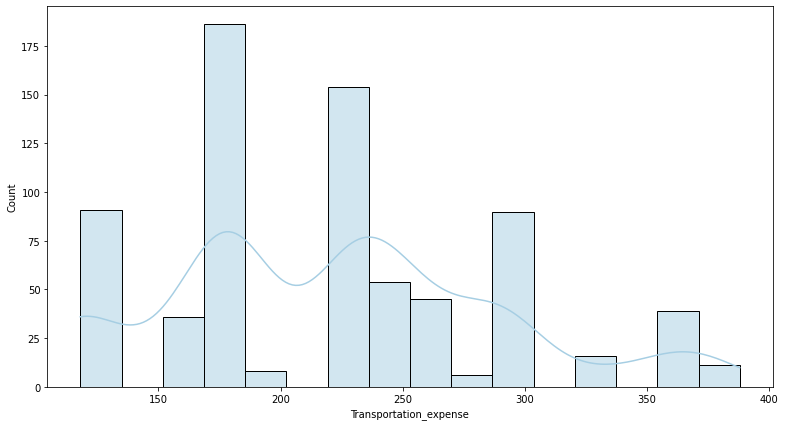

In [677]:
sns.histplot(df.Transportation_expense,kde=True);

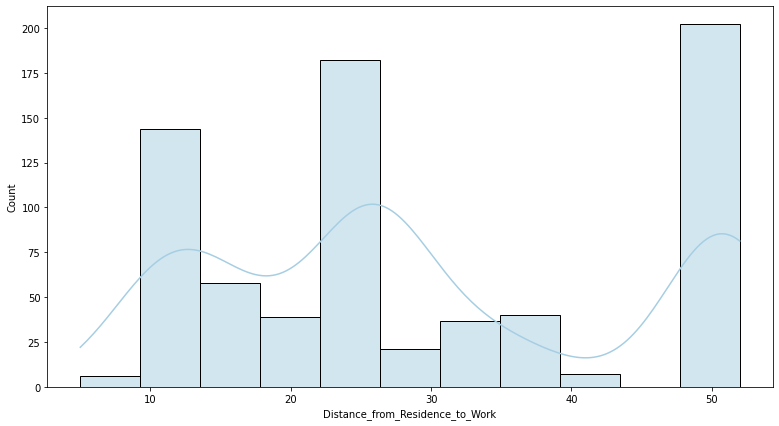

In [678]:
sns.histplot(df.Distance_from_Residence_to_Work,kde=True);

In [646]:
# df[["Transportation_expense"]].max()

In [645]:
# df[["Transportation_expense"]].min()

In [647]:
# df[["Transportation_expense"]].describe().T

In [ ]:
sns.pairplot(df, 
             hue="Seasons",
             palette= ("tab10"),             
             kind="reg",
             x_vars=['Age', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours'], 
             y_vars =['Age', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours']);

In [ ]:
sns.pairplot(df, 
             hue="Son", 
             palette= ("tab10"), 
             kind="reg",
             x_vars=['Age', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours'], 
             y_vars =['Age', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours']);

# Examining the Target Variable

In [713]:
df["Absenteeism_time_in_hours"].value_counts()

8      208
2      157
3      112
1      88 
4      60 
0      40 
16     19 
24     16 
40     7  
5      7  
32     6  
64     3  
80     3  
120    3  
112    2  
56     2  
48     1  
7      1  
104    1  
Name: Absenteeism_time_in_hours, dtype: int64

In [715]:
df[["Absenteeism_time_in_hours"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Absenteeism_time_in_hours,736.00,6.96,13.36,0.00,2.00,3.00,8.00,120.00


#### [Correlations between target variable and other variables<br><br>ターゲット変数と他の変数間の相関](#corr_target)


In [720]:
pd.DataFrame(corr_t)

,0
0,Reason_for_absence
1,-0.18
2,Month_of_absence
3,0.02
4,Day_of_the_week
5,-0.12
6,Seasons
7,-0.01
8,Transportation_expense
9,0.03


In [701]:
df[["Absenteeism_time_in_hours"]].sum()

Absenteeism_time_in_hours    5124
dtype: int64

In [704]:
df[df["Absenteeism_time_in_hours"]==0]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
1,36,0,7,3,1,118,13,18,50,239.55,97,1,1,1,1,0,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241.48,92,1,1,4,1,0,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241.48,92,1,1,1,0,0,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241.48,92,1,1,2,1,0,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241.48,92,1,1,1,1,0,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241.48,92,1,1,3,1,0,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253.47,93,1,1,1,1,0,0,98,178,31,0
134,34,27,1,2,2,118,10,10,37,308.59,95,0,1,0,0,0,0,83,172,28,0
203,2,0,4,2,3,235,29,12,48,326.45,96,1,1,1,0,1,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378.88,92,1,1,2,1,1,0,68,168,24,0


In [ ]:
df.query("Absenteeism_time_in_hours == 0").count()

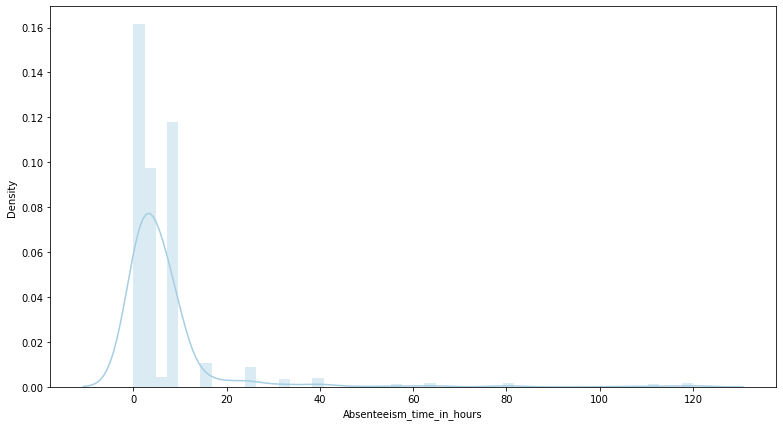

In [682]:
sns.distplot(df.Absenteeism_time_in_hours,kde=True);

In [ ]:
# sns.kdeplot(df.Absenteeism_time_in_hours);

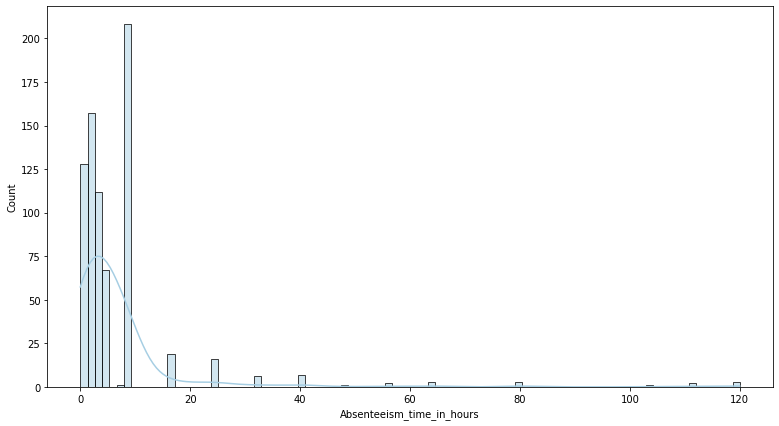

In [683]:
sns.histplot(df.Absenteeism_time_in_hours,kde=True);

In [685]:
df_Cat.columns

Index(['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet'], dtype='object')

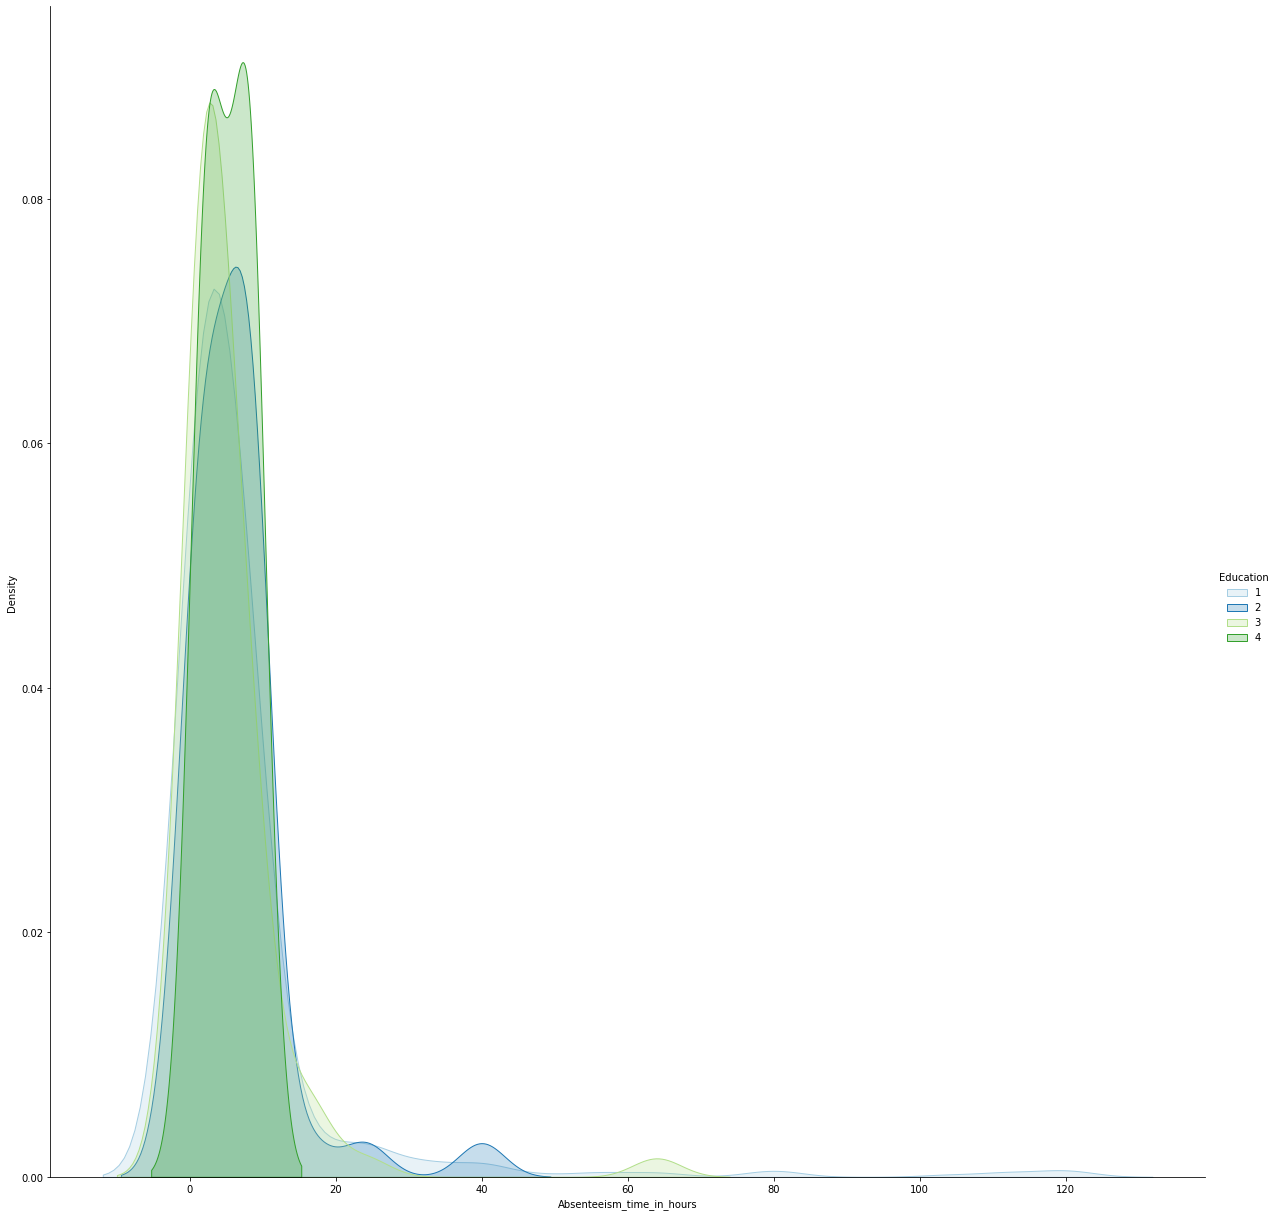

In [712]:
(sns
 .FacetGrid(df,
              hue = "Education",
              height = 17)
 .map(sns.kdeplot, "Absenteeism_time_in_hours", shade= True)
 .add_legend()
);

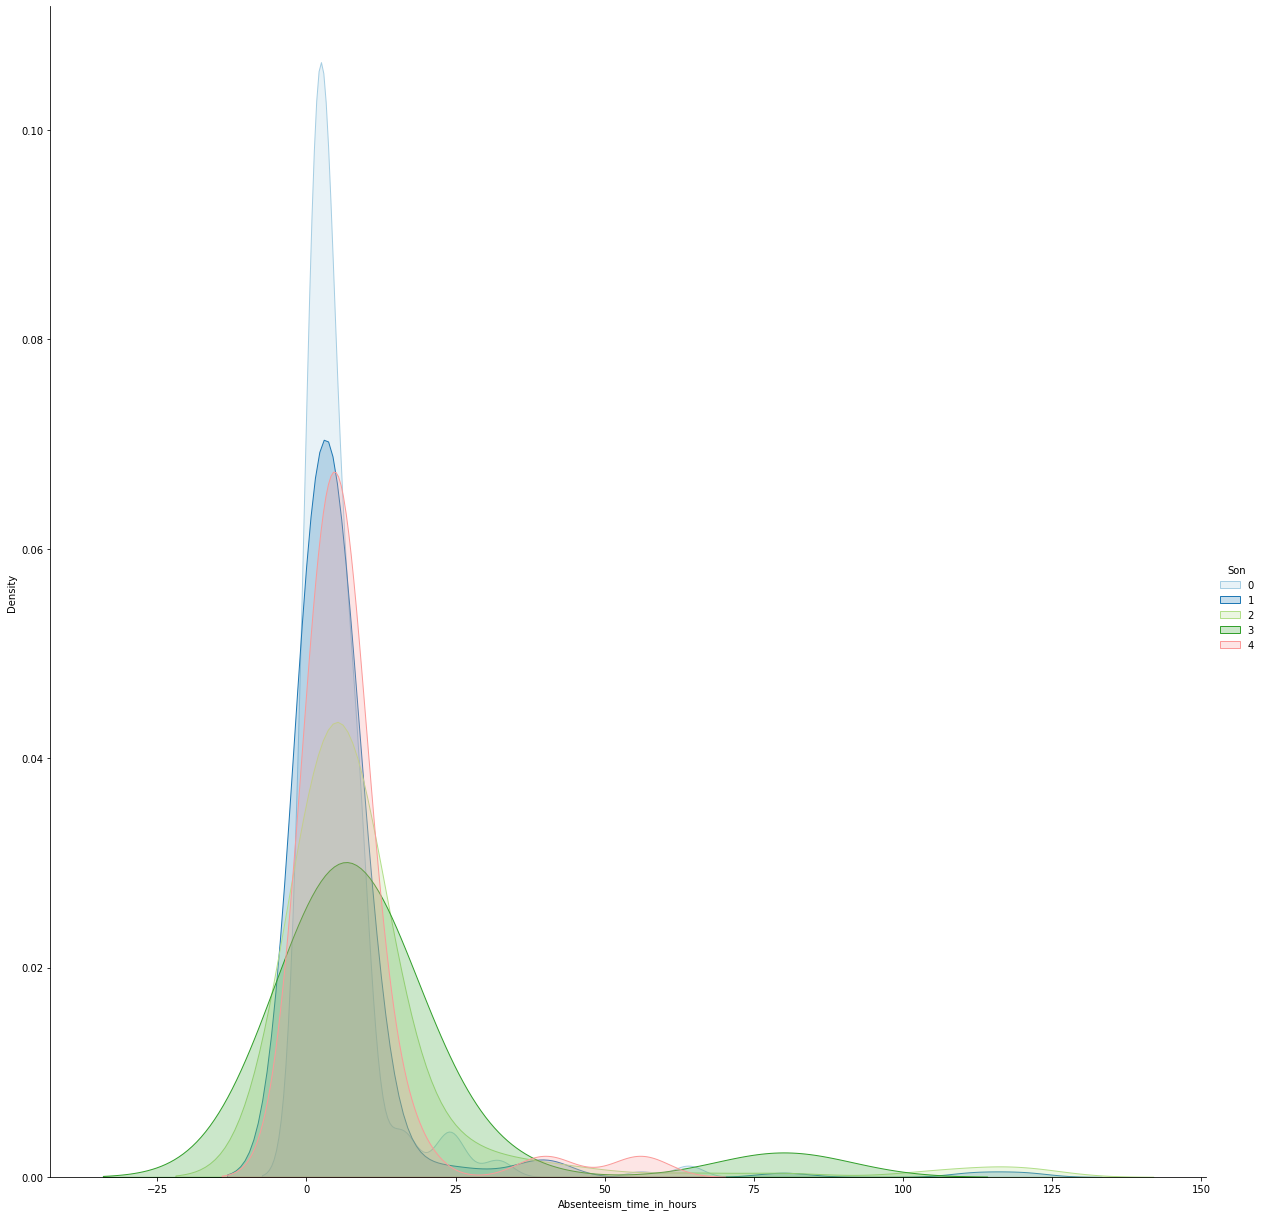

In [699]:
(sns
 .FacetGrid(df,
              hue = "Son",
              height = 17)
 .map(sns.kdeplot, "Absenteeism_time_in_hours", shade= True)
 .add_legend()
);

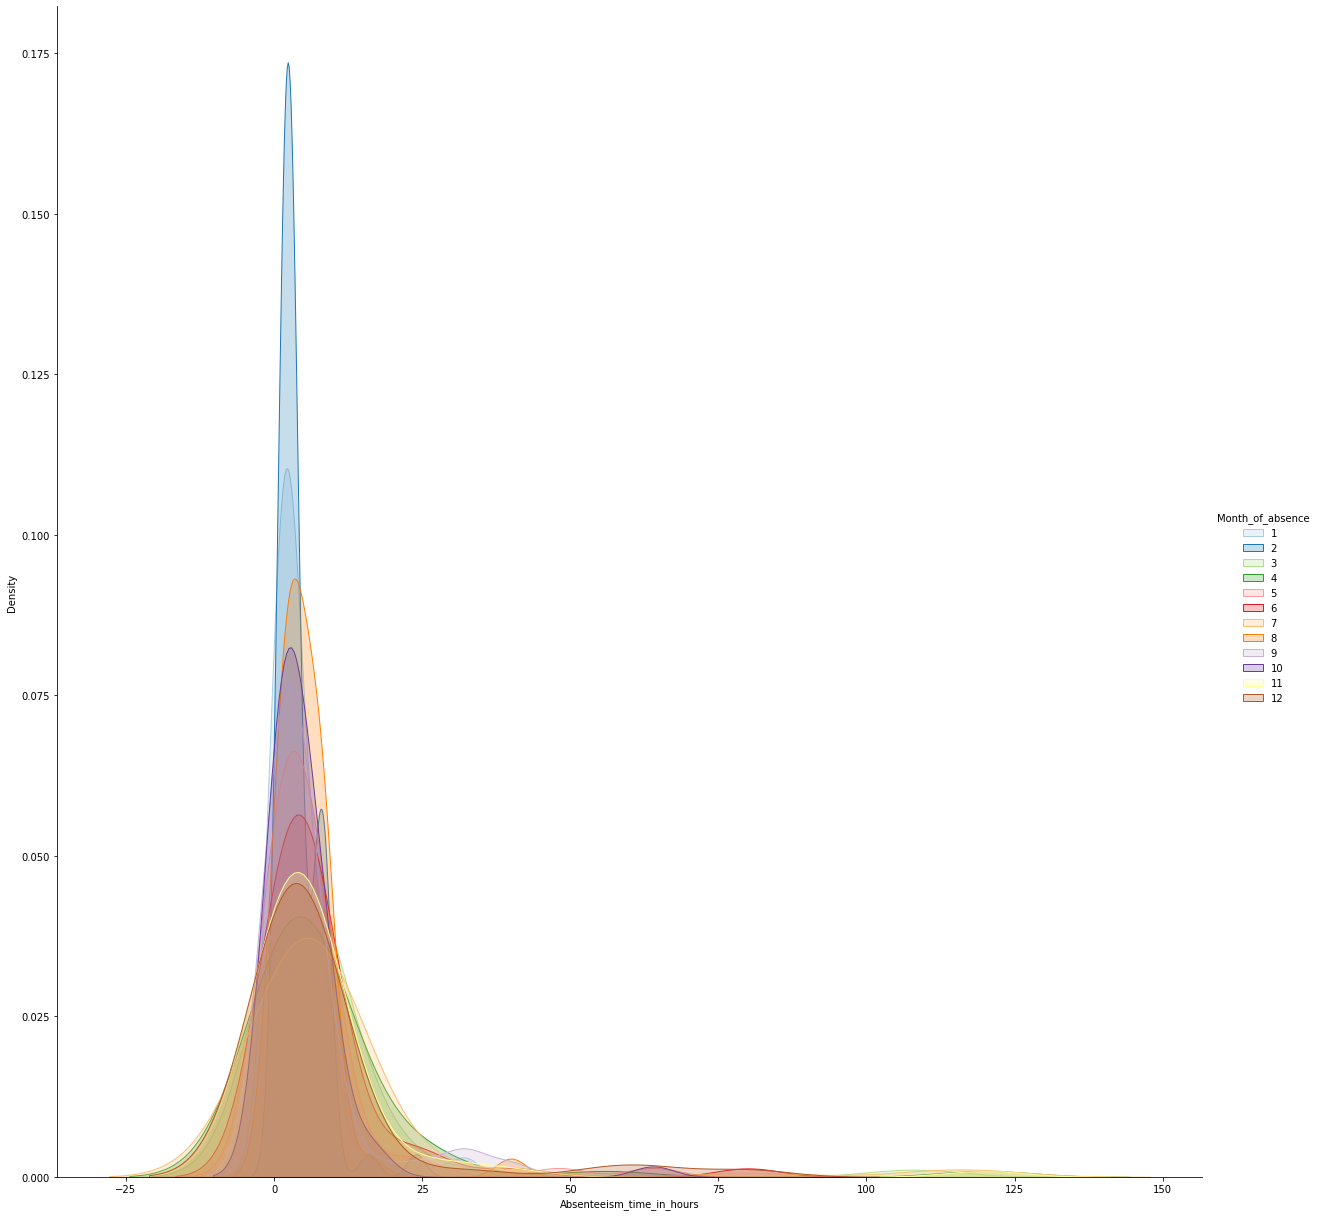

In [698]:
(sns
 .FacetGrid(df,
              hue = "Month_of_absence",
              height = 17)
 .map(sns.kdeplot, "Absenteeism_time_in_hours", shade= True)
 .add_legend()
);

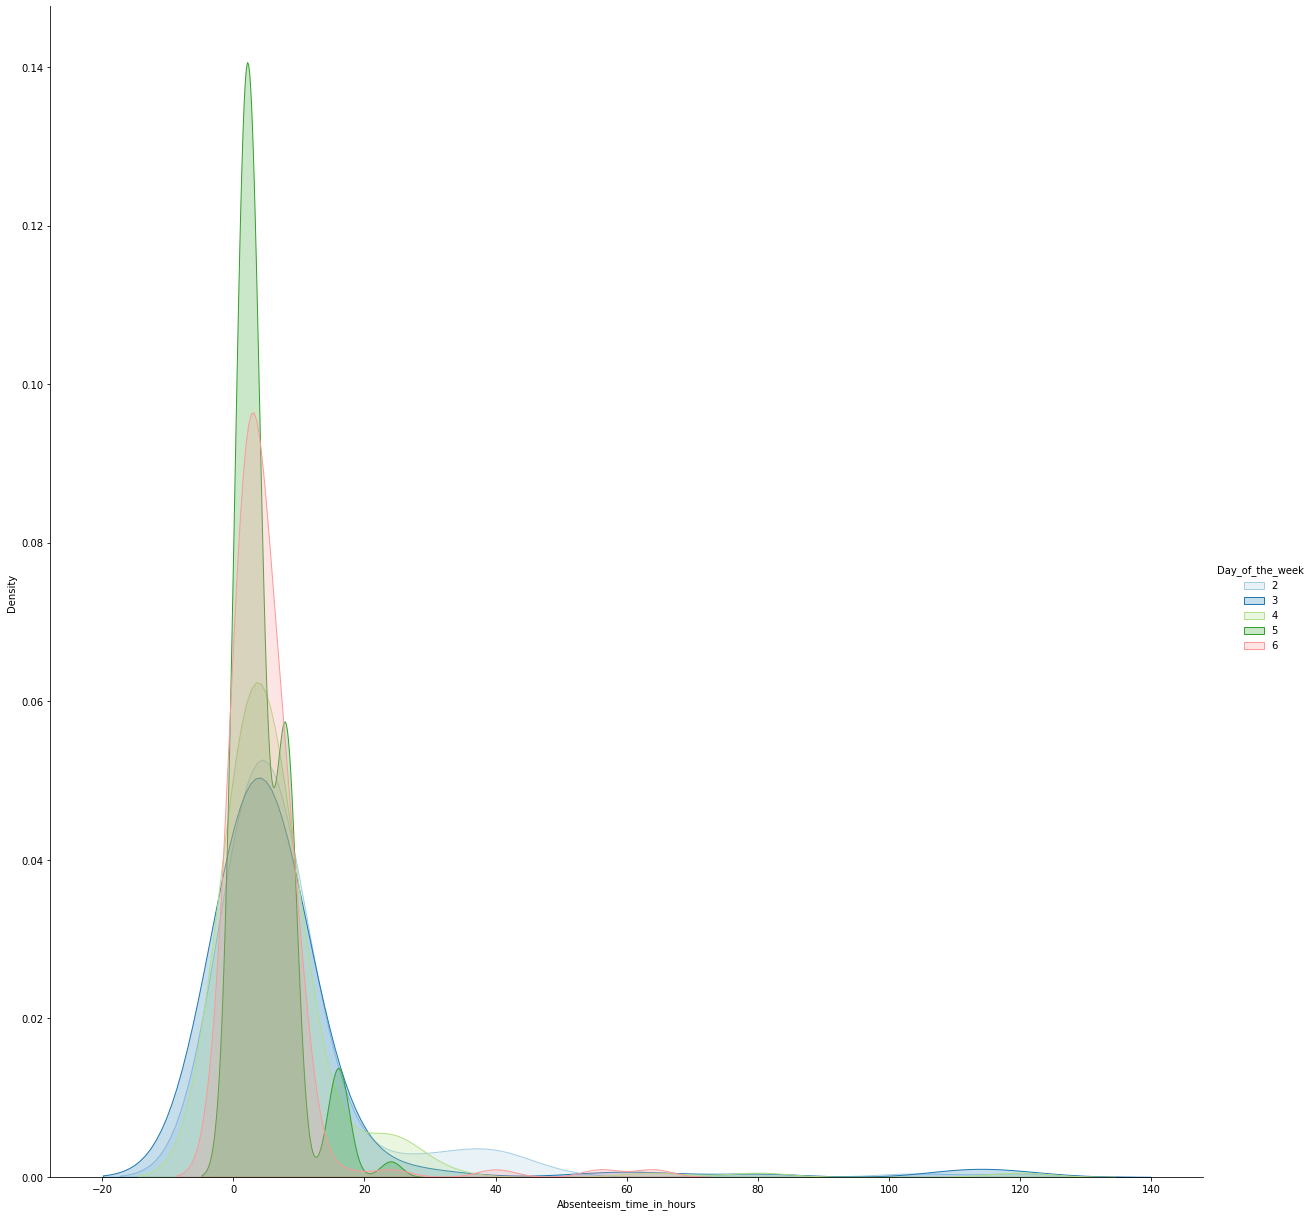

In [710]:
(sns
 .FacetGrid(df,
              hue = "Day_of_the_week",
              height = 17)
 .map(sns.kdeplot, "Absenteeism_time_in_hours", shade= True)
 .add_legend()
);